In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from IPython.display import display, HTML
from sklearn.preprocessing import scale 

# Import Data

In [2]:
data = pd.read_csv('C:/Users/Eugene/Desktop/Courses of the Master of Statistics/Fourth Semester/Big Data/Assignment 2/hmeq.csv')

In [5]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# Delete rows that contains 80% of NaNs

In [3]:
data = data.dropna(thresh=10)
print(data.head())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
5    1  1700  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0        NaN  
1  121.833333   0.0  14.0        NaN  
2  149.466667   1.0  10.0        NaN  
4   93.333333   0.0  14.0        NaN  
5  101.466002   1.0   8.0  37.113614  


# Missing Data 

In [4]:
#Select all columns one by one and replace missing values

#Means
data['MORTDUE'] = data['MORTDUE'].fillna(data['MORTDUE'].mean()) 
data['VALUE'] = data['VALUE'].fillna(data['VALUE'].mean()) 
data['DEROG'] = data['DEROG'].fillna(data['DEROG'].mean()) 
data['DELINQ'] = data['DELINQ'].fillna(data['DELINQ'].mean()) 
data['CLAGE'] = data['CLAGE'].fillna(data['CLAGE'].mean()) 
data['NINQ'] = data['NINQ'].fillna(data['NINQ'].mean()) 
data['CLNO'] = data['CLNO'].fillna(data['CLNO'].mean()) 
data['YOJ'] = data['YOJ'].fillna(data['YOJ'].mean()) 
data['DEBTINC'] = data['DEBTINC'].fillna(data['DEBTINC'].mean()) 

#Mode (mode is Debtcon)
data['REASON'] = data['REASON'].fillna('DebtCon')

#New category
data['JOB'] = data['JOB'].fillna('Unempl')

# Outliers

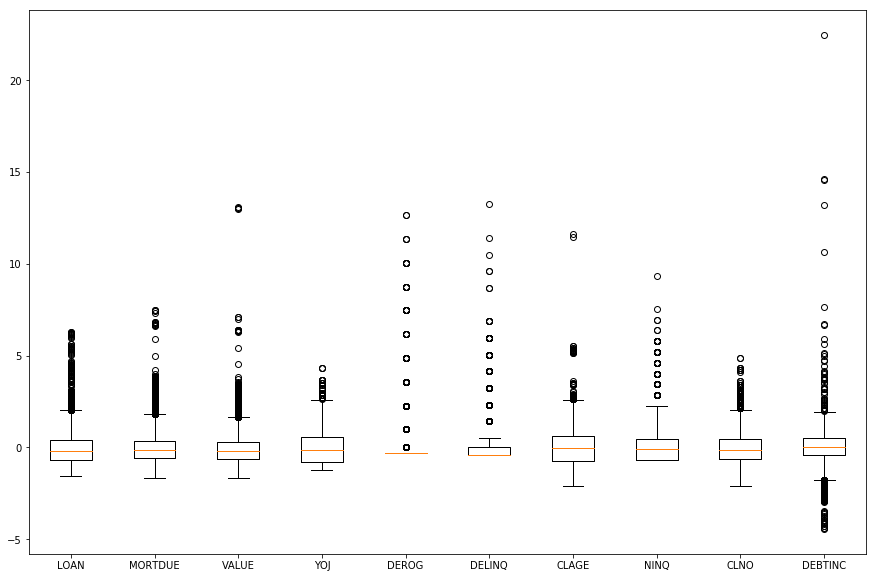

In [37]:
num_data = data.select_dtypes(exclude=['object']).copy()
num_data_2 = num_data.drop(['BAD'], axis=1)
data_scaled = scale(num_data_2)

# Create a figure instance
fig = plt.figure(1, figsize=(15, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bxlabs=list(num_data_2)

# Create the boxplot
bp = ax.boxplot(data_scaled,labels=bxlabs,showfliers=True)
plt.show()

In [5]:
#Define the truncate function
def truncate(Ys):
    
    Q1 = Ys.quantile(0.25)
    Q3 = Ys.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound =  Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    value_outlier_Y_up = Ys > upper_bound
    value_outlier_Y_low = Ys < lower_bound
    outlier_listUB=len(Ys[value_outlier_Y_up])
    outlier_listLB=len(Ys[value_outlier_Y_low])
    if outlier_listUB != 0:
        Yn = Ys.replace([Ys[value_outlier_Y_up]], upper_bound)
    if outlier_listLB != 0:
        Yn = Yn.replace([Yn[value_outlier_Y_low]], lower_bound) 
    
    return Yn

In [39]:
truncate(data['MORTDUE'])[1:5]


1    70053.0
2    13500.0
4    97800.0
5    30548.0
Name: MORTDUE, dtype: float64

In [6]:
#Apply the truncate function
data['MORTDUE'] = truncate(data['MORTDUE'])
data['LOAN'] = truncate(data['LOAN'])
data['VALUE'] = truncate(data['VALUE'])
data['YOJ'] = truncate(data['YOJ'])
data['DEROG'] = truncate(data['DEROG'])
data['DELINQ'] = truncate(data['DELINQ'])
data['CLAGE'] = truncate(data['CLAGE'])
data['NINQ'] = truncate(data['NINQ'])
data['CLNO'] = truncate(data['CLNO'])
data['DEBTINC'] = truncate(data['DEBTINC'])

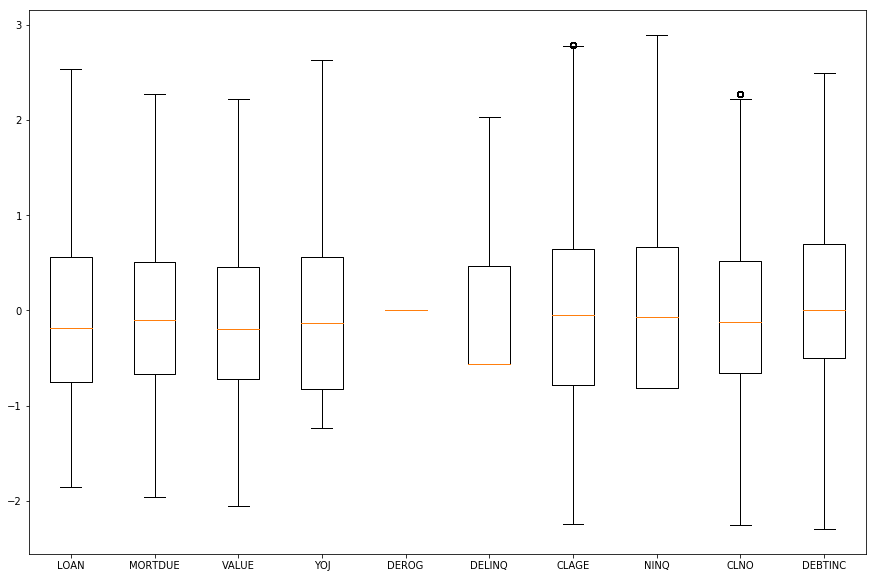

In [41]:
num_data = data.select_dtypes(exclude=['object']).copy()
num_data_2 = num_data.drop(['BAD'], axis =1)
data_scaled = scale(num_data_2)

# Create a figure instance
fig = plt.figure(1, figsize=(15, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_scaled,labels=bxlabs,showfliers=True)
plt.show()

# Dummy Coding
Hao's work adapted

In [7]:
#Create the dummies for categorical data
data['REASON'] = data['REASON'].astype('category')
data['REASON_code'] = data['REASON'].cat.codes
data['JOB'] = data['JOB'].astype('category')
data['JOB_code'] = data['JOB'].cat.codes

#Map Numeric data
print (dict(enumerate(data['REASON'].cat.categories)))
print (dict(enumerate(data['JOB'].cat.categories)))

#Creat New dataset for training and testing
data = data.drop(['REASON', 'JOB'], axis=1)

#Type of variables
print(data.dtypes)

{0: 'DebtCon', 1: 'HomeImp'}
{0: 'Mgr', 1: 'Office', 2: 'Other', 3: 'ProfExe', 4: 'Sales', 5: 'Self', 6: 'Unempl'}
BAD              int64
LOAN             int64
MORTDUE        float64
VALUE          float64
YOJ            float64
DEROG          float64
DELINQ         float64
CLAGE          float64
NINQ           float64
CLNO           float64
DEBTINC        float64
REASON_code       int8
JOB_code          int8
dtype: object


# Class Imbalance

In [ ]:
#Visualize the class imbalance problem
plt.figure()
sns.countplot(x='BAD', data=data, palette = 'RdBu')
plt.rcParams['figure.figsize']=(5,5)

In [57]:
#Count the number of BAD 0 and 1
count01 = data['BAD'].value_counts()
count01

0    4496
1    1125
Name: BAD, dtype: int64

In [ ]:
#Percentage of Bad and Good customers
Percentage_Good = count01[0]/(count01[0]+count01[1])
Percentage_Bad = 1 - Percentage_Good
print(Percentage_Bad)
print(Percentage_Good)

# Creating the Training and Test Sets

In [8]:
#Use the training dataset to build and validate the model, and treat the test dataset as the unseen new data.
#75% training set; 25% test set
training_features, test_features, training_target, test_target, = train_test_split(data.drop(['BAD'], axis=1),
                                               data['BAD'],
                                               test_size = .25,
                                               random_state=12)

# overview of training set
training_set = pd.concat([training_features, training_target], axis=1)

# Oversampling on Training data

In [12]:
# type this in your anaconda prompt before executing: pip install -U imbalanced-learn (I struggled, do
# not remember the exact procedure)

# Paper explaining SMOTE --> See page 328     https://www.jair.org/media/953/live-953-2037-jair.pdf 
#      "Take the difference between the feature vector (sample) under consideration and its nearest neighbor.
#      Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration.
#      This causes the selection of a random point along the line segment between two specific features. This
#      approach effectively forces the decision region of the minority class to become more general.

from sklearn.datasets import make_classification
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ImportError: cannot import name 'Bunch'

In [10]:
#Seperate Training dataset for training (90%) and validation (10%)
#SOURCE:https://beckernick.github.io/oversampling-modeling/
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)



In [ ]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTE
#Apply SMOTE --> Keeps error saying string other cannot be converted into float
sm = SMOTE(random_state=12) #set state so that we have the same generated data everytime
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
print(sorted(Counter(y_train_res).items())) #to count the instances of BAD_0 and BAD_1

In [18]:
#Apply RandomOverSampler (both SMOTE & RandomOverSampler works, but SMOTE is used)
#Source: http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html
from imblearn.over_sampling import RandomOverSampler

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

ros = RandomOverSampler(random_state=0)
x_train_res_ros, y_train_res_ros = ros.fit_sample(x_train, y_train)
from collections import Counter
print(sorted(Counter(y_train_res_ros).items()))

ModuleNotFoundError: No module named 'imblearn'

# Converting numeirical into categorial) 

In [11]:
test = pd.get_dummies(data, columns=['JOB_code','REASON_code'])
print(test.head())

   BAD  LOAN  MORTDUE     VALUE   YOJ  DEROG    DELINQ       CLAGE  NINQ  \
0    1  1100  25860.0   39025.0  10.5    0.0  0.000000   94.366667   1.0   
1    1  1300  70053.0   68400.0   7.0    0.0  1.121639  121.833333   0.0   
2    1  1500  13500.0   16700.0   4.0    0.0  0.000000  149.466667   1.0   
4    0  1700  97800.0  112000.0   3.0    0.0  0.000000   93.333333   0.0   
5    1  1700  30548.0   40320.0   9.0    0.0  0.000000  101.466002   1.0   

   CLNO    DEBTINC  JOB_code_0  JOB_code_1  JOB_code_2  JOB_code_3  \
0   9.0  34.070547           0           0           1           0   
1  14.0  34.070547           0           0           1           0   
2  10.0  34.070547           0           0           1           0   
4  14.0  34.070547           0           1           0           0   
5   8.0  37.113614           0           0           1           0   

   JOB_code_4  JOB_code_5  JOB_code_6  REASON_code_0  REASON_code_1  
0           0           0           0              0

# Model
Hao's Work

In [20]:
# SVM For classification
from sklearn.svm import SVC
clf_SVC=SVC()
clf_SVC.fit(x_train_res, y_train_res)
print("SVC Score: ",clf_SVC.score(x_val,y_val))
#print(fbeta_score(y_train[:223], clf_SVC.predict(X_test),beta=0.5))

NameError: name 'x_train_res' is not defined

# EUGENE

In [12]:
from sklearn.svm import SVC
from sklearn.cross_validation import KFold, cross_val_score

C:\Users\Eugene\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#MAKING PREDICTIONS WITH SVC

clf_SVC=SVC(probability=True)
SVC_fit=clf_SVC.fit(x_train, y_train)
print("SVC Score: ",clf_SVC.score(x_val,y_val))

#10-fold CV
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)

print (cross_val_score(SVC_fit, x_train, y_train, cv=k_fold, n_jobs=1))

#Predictions from random forest classifier
SVC_pred = SVC_fit.predict(test_features)


SVC Score:  0.774881516588
[ 0.77368421  0.81052632  0.82368421  0.80211082  0.81002639  0.77044855
  0.823219    0.79155673  0.81530343  0.823219  ]


[[1117    0]
 [ 289    0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.89      1117
          1       0.00      0.00      0.00       289

avg / total       0.63      0.79      0.70      1406



C:\Users\Eugene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


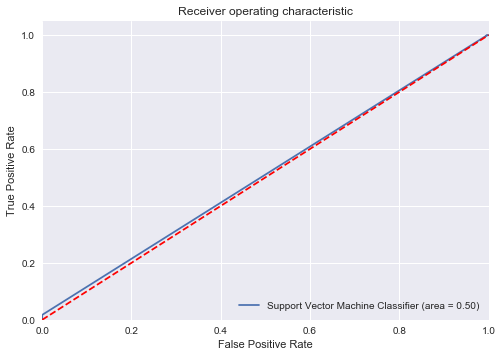

In [25]:
#Confusion matrix and ROC curve for SVC
from sklearn.metrics import confusion_matrix
confusion_matrixSVC = confusion_matrix(test_target, SVC_pred)
print(confusion_matrixSVC)


#Model evaluation score for SVC
from sklearn.metrics import classification_report
print(classification_report(test_target, SVC_pred))

#ROC for SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVC_roc_auc = roc_auc_score(test_target, SVC_pred)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(test_target, SVC_fit.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine Classifier (area = %0.2f)' % SVC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC')
plt.show()

In [27]:
print(SVC_fit.predict_proba(test_features))

[[ 0.8045913  0.1954087]
 [ 0.8045913  0.1954087]
 [ 0.8045913  0.1954087]
 ..., 
 [ 0.8045913  0.1954087]
 [ 0.8045913  0.1954087]
 [ 0.8045913  0.1954087]]


In [23]:
#Random Forest For classification

from sklearn import preprocessing
#Scale value of features so that different values due to different units do not cause an issue
new_training_set = data.drop(['BAD'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
new_training_set_scaled = min_max_scaler.fit_transform(new_training_set)


from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=0,n_estimators = 100)
clf_RF.fit(x_train_res, y_train_res)
print("RF Score: ",clf_RF.score(x_val,y_val))
for name, importance in zip(new_training_set.columns, clf_RF.feature_importances_):
    print(name, "=", importance)
#print(fbeta_score(y_train[:223], clf_RF.predict(X_test),beta=0.5))
# SEB: these results can be used as a first stage for feature selection as it shows the importance of each feature
# then , we could rerun the model without the not important features. 

NameError: name 'x_train_res' is not defined

# EUGENE

In [28]:
#Making predictions for the random forest classifier
from sklearn import preprocessing
#Scale value of features so that different values due to different units do not cause an issue
new_training_set = data.drop(['BAD'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
new_training_set_scaled = min_max_scaler.fit_transform(new_training_set)


from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=0,n_estimators = 100)
RFC_fit=clf_RF.fit(x_train, y_train)

from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)

print (cross_val_score(RFC_fit, x_train, y_train, cv=k_fold, n_jobs=1))

#Predictions from random forest classifier
RFC_pred = RFC_fit.predict(test_features)

[ 0.89210526  0.93157895  0.92105263  0.91556728  0.91292876  0.87598945
  0.9182058   0.92348285  0.93139842  0.91556728]


[[1090   27]
 [ 109  180]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      1117
          1       0.87      0.62      0.73       289

avg / total       0.90      0.90      0.90      1406



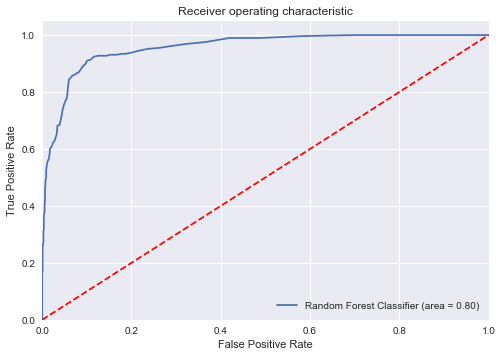

In [29]:
#Confusion matrix and ROC curve for random classifier
from sklearn.metrics import confusion_matrix
confusion_matrixRFC = confusion_matrix(test_target, RFC_pred)
print(confusion_matrixRFC)
#1090 correctly classified as '0' and 180 as '1'

#Model evaluation score for RFC
from sklearn.metrics import classification_report
print(classification_report(test_target, RFC_pred))

#ROC for RFC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RFC_roc_auc = roc_auc_score(test_target, RFC_pred)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_target, RFC_fit.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (area = %0.2f)' % RFC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')
plt.show()


Accuracy of logistic regression classifier on test set: 0.79
10-fold cross validation average accuracy: 0.802
[[1117    0]
 [ 289    0]]


C:\Users\Eugene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.79      1.00      0.89      1117
          1       0.00      0.00      0.00       289

avg / total       0.63      0.79      0.70      1406



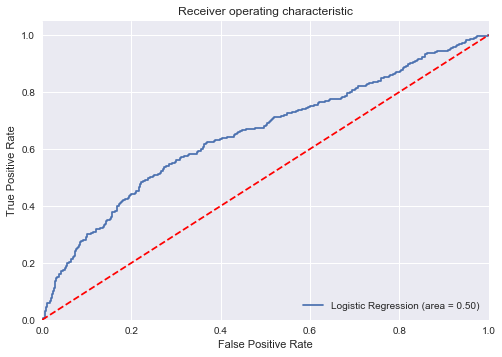

In [25]:
#Logistic Regression 
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(training_features, training_target)
y_pred = logreg.predict(test_features)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_features, test_target)))

#10-fold cross validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, training_features, training_target, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
#The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

#Confusion Matrix 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_target, y_pred)
print(confusion_matrix)
#The result is telling us that we have 1072+114 correct predictions and 175+45 incorrect predictions. 
#If you try, you will get something else since it is random. 

#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(test_target, y_pred))

#ROC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_target, logreg.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_target, logreg.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#The dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).
#

# Feature Selection
    # VARIATION

    # CORRELATION (made by pierre)

new_data = correlation(data,0.5)
new_data
#RESULT Deleted columns : Value, CLNO, DEBTINC (categorial variables not taken into account I assume: Reason & Job)

    # Chi-Squarred method (Univariate feature selection)

In [ ]:
#This method allows to define the number of features we want to end up with (use parameter k)
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = data.drop(['BAD'], axis=1), data['BAD']
print(X.shape)

X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_pd = pd.DataFrame(X_new)
X_pd.head()

    # Recursive featur elimination with cross validation 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
X, y = data.drop(['BAD'], axis=1), data['BAD']

# Create the RFE object and compute a cross-validated score.
clf = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)
ranking = rfecv.ranking_
print(ranking)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

    # Recursive feature elimination (Hao)

# EUGENE

In [ ]:
#RECURSIVE FEATURE ELIMINATION
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Automatically created module for IPython interactive environment
